# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.636263e+01     1.538320e+01
 * time: 0.0015621185302734375
     1     3.367981e+01     8.703295e+00
 * time: 0.006003141403198242
     2     3.252385e+01     1.228722e+01
 * time: 0.011240959167480469
     3     2.540308e+01     7.333772e+00
 * time: 0.016270160675048828
     4     2.249314e+01     3.629437e+00
 * time: 0.021116971969604492
     5     2.005939e+01     2.437551e+00
 * time: 0.026287078857421875
     6     1.918930e+01     1.548835e+00
 * time: 0.0315699577331543
     7     1.852949e+01     1.487351e+00
 * time: 0.05865597724914551
     8     1.827564e+01     1.197077e+00
 * time: 0.06243300437927246
     9     1.799381e+01     9.697063e-01
 * time: 0.06612300872802734
    10     1.777945e+01     7.636939e-01
 * time: 0.07000494003295898
    11     1.761109e+01     5.548165e-01
 * time: 0.07369399070739746
    12     1.752323e+01     1.072682e+00
 * time: 0.07699394226074219
    13     1.746235e+01     7.105150e-01
 *

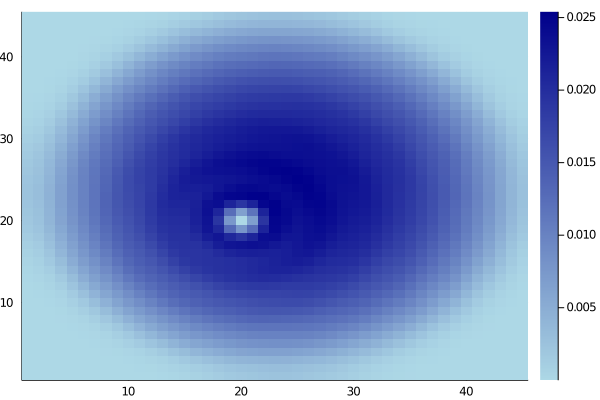

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)